## Lec84: Link Analysis - Implementing Page Rank using Random Walk Method - 1


* Teleportation - Jumping to a node uniformly at random when there are no out edges

Steps :
--------
* Create/take a directed graph
* Perform a random walk (imp)
* Get sorted nodes as per points accumulated during random walk
* Compare the ranks thus obtained with the ranks obtainrd from the inbuilt Page rank method

## Lec85: Link Analysis - Implementing Page Rank using Random Walk Method - 2


In [2]:
import networkx as nx
import random
import numpy as np

def add_edges(G, p):
    #Randomly adding edges
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                r = random.random()
                if r <= p:
                    G.add_edge(i, j)
                else:
                    continue                
    return G
              
def get_nodes_sorted_by_RW(points):
    points_array = np.array(points)
    #returns the indices of the list sorted
    nodes_sorted_by_RW = np.argsort(-points_array)# - for desc order
    return nodes_sorted_by_RW

def random_walk(G):
    nodes = G.nodes()
    RW_points = [0 for i in range(G.number_of_nodes())]
    r = random.choice(nodes)
    RW_points[r] += 1
    out = G.out_edges(r)
    
    cnt = 0
    while cnt != 10000:
        #Teleportation
        if len(out) == 0:
            focus = random.choice(nodes)
        else:
            r1 = random.choice(out)
            focus = r1[1]
        RW_points[focus] += 1
        out = G.out_edges(focus)
        cnt += 1
        
    return RW_points
        
        
def main():
    # 1. Create/take a directed graph with 'n' nodes.
    G = nx.DiGraph()#empty graph
    G.add_nodes_from([i for i in range(10)])
    G = add_edges(G, 0.3)

    # 2. Perform a random walk
    RW_points = random_walk(G)
    
    # 3. Get nodes' raking as per the points accumulated
    nodes_sorted_by_RW = get_nodes_sorted_by_RW(RW_points)
    print 'nodes_sorted_by_points : ', nodes_sorted_by_RW
    
    # 4. Compare the ranks thus obtained with the ranks obtainrd from the inbuilt Page rank method
    pr = nx.pagerank(G)# Return a dictionary
    pr_sorted = sorted(pr.items(), key = lambda x:x[1], reverse = True)
    print 'Page Rank by Inbuilt Method'
    for i in pr_sorted:
        print i[0],
        
main()

nodes_sorted_by_points :  [9 8 4 1 6 3 2 5 0 7]
Page Rank by Inbuilt Method
9 8 4 1 6 3 2 5 0 7


## Lec86: Link Analysis - Degree Rank and Page Rank



27770


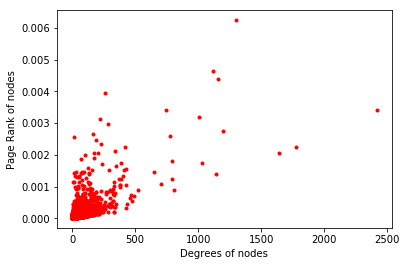

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def main():
    G = nx.read_edgelist('Cit-HepTh.txt', create_using = nx.DiGraph())
    print G.number_of_nodes()
    
    deg = G.in_degree() #returns the Dictionay of nodes and degrees
    pr = nx.pagerank(G) #returns the Dict
    
    pr_values = []
    
    # As dictionary doesn't retain the inserion order 
    for i in deg.keys():
        pr_values.append(pr[i])
        
    plt.plot(deg.values(), pr_values, 'ro', markersize = 3)
    plt.xlabel('Degrees of nodes')
    plt.ylabel('Page Rank of nodes')
    plt.show()
    
main()

Inference
---
* Indegree and page rank of the nodes are not correlated
* Reason : Page rank depends not only on the number of edges pointed to it but also the importance of the nodes that are pointing to it
* Hence a node with less indegree of the important nodes pointing to it can get the highest page rank(means rank 1, 2,.. not  100, 102)
